# Import necessary libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2022-01-25 12:05:02.812475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 12:05:02.812596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Create image generators

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   zoom_range = 0.23,
                                   rotation_range = 45,
                                   shear_range = 0.19,
                                   vertical_flip=True,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory('./data/train', batch_size=20, class_mode='categorical', target_size=(220, 220))
validation_generator = val_datagen.flow_from_directory('./data/valid', batch_size=20, class_mode='categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory('./data/test', shuffle=False, batch_size=20, class_mode='categorical', target_size=(220, 220))

Found 1651 images belonging to 13 classes.
Found 65 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


# Model creation

In [4]:
# define the model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(220, 220, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(13, activation='softmax'))
# compile model
model.summary()
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0

# Model Training

In [5]:
# history = model.fit(
#     train_generator, validation_data=validation_generator, 
#     epochs=15,verbose=2)

In [6]:
model = load_model('model/model.h5')

# Metrics

In [8]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

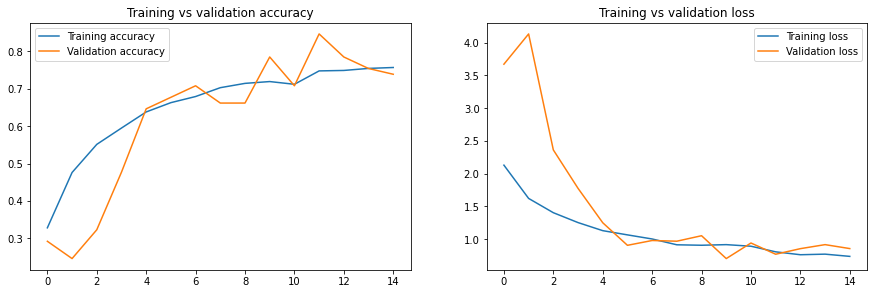

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [9]:
pred = model.predict(test_generator)

In [10]:
y_pred = np.argmax(pred, axis=1)

In [11]:
y_pred_class = dict((v, k) for k,v in test_generator.class_indices.items())

In [12]:
y_pred = list(map(lambda x: y_pred_class[x], y_pred))

In [13]:
y_true = test_generator.classes

In [14]:
y_true = list(map(lambda x: y_pred_class[x], y_true))

In [15]:
print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

       baseball       1.00      1.00      1.00         5
     basketball       1.00      0.60      0.75         5
     beachballs       1.00      1.00      1.00         5
  billiard ball       1.00      0.60      0.75         5
   bowling ball       0.71      1.00      0.83         5
   cricket ball       1.00      1.00      1.00         5
       football       0.83      1.00      0.91         5
      golf ball       0.60      0.60      0.60         5
    soccer ball       0.71      1.00      0.83         5
    tennis ball       0.83      1.00      0.91         5
    volley ball       0.60      0.60      0.60         5
water polo ball       1.00      0.60      0.75         5
    wiffle ball       0.40      0.40      0.40         5

       accuracy                           0.80        65
      macro avg       0.82      0.80      0.79        65
   weighted avg       0.82      0.80      0.79        65



In [16]:
results = model.evaluate(test_generator)

4/4 [==============================] - 2s 438ms/step - loss: 0.7686 - accuracy: 0.8000


In [17]:
model.save("./model/model.h5")

In [18]:
# import time

# ts = int(time.time())
# file_path = f"./img_classifier/{ts}/"
# model.save(filepath=file_path, save_format='tf')

INFO:tensorflow:Assets written to: ./img_classifier/1643102856/assets
